In [1]:
#clear directories if they exist
import shutil
try:
    shutil.rmtree("data/train")
    shutil.rmtree("data/test")
except:
    pass

In [2]:
#create train and test directories
import os
from pathlib import Path

Path("data/train/damage").mkdir(parents=True, exist_ok=True)
Path("data/train/no_damage").mkdir(parents=True, exist_ok=True)

Path("data/test/damage").mkdir(parents=True, exist_ok=True)
Path("data/test/no_damage").mkdir(parents=True, exist_ok=True)

In [3]:
#get images from OS
all_damage_paths = os.listdir('data/damage')
all_no_damage_paths = os.listdir('data/no_damage')

In [4]:
print("amount of damage images", len(all_damage_paths))
print("amount of non damage images", len(all_no_damage_paths))

amount of damage images 14170
amount of non damage images 7152


/tmp/ipykernel_5158/1449807412.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


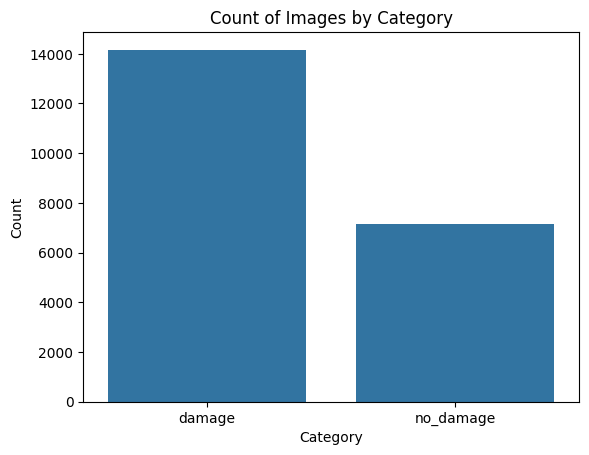

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with a 'Category' column using the counts from arrays
df = pd.DataFrame({
    'Category': (["damage"] * len(all_damage_paths)) + (["no_damage"] * len(all_no_damage_paths))
})

# Plot the countplot
sns.countplot(x='Category', data=df)
plt.title('Count of Images by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [6]:
# populate train and test variables
import random

train_damage_paths = random.sample(all_damage_paths, int(len(all_damage_paths)*0.8))
print("train damage image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in all_damage_paths if p not in train_damage_paths]
print("test damage image count: ", len(test_damage_paths))
# ensure no overlap:
overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("len of overlap: ", len(overlap))

train_no_damage_paths = random.sample(all_no_damage_paths, int(len(all_no_damage_paths)*0.8))
print("train no_damage image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in all_no_damage_paths if p not in train_no_damage_paths]
print("test no_damage image count: ", len(test_no_damage_paths))
# ensure no overlap:
overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("len of overlap: ", len(overlap))

train damage image count:  11336
test damage image count:  2834
len of overlap:  0
train no_damage image count:  5721
test no_damage image count:  1431
len of overlap:  0


In [7]:
import shutil

# Copy the "damage" images:
for p in train_damage_paths:
    if p != ".ipynb_checkpoints":
        shutil.copyfile(os.path.join('data', 'damage', p),
                        os.path.join('data', 'train', 'damage', p))

for p in test_damage_paths:
    if p != ".ipynb_checkpoints":
        shutil.copyfile(os.path.join('data', 'damage', p),
                        os.path.join('data', 'test', 'damage', p))

# Copy the "no_damage" images:
for p in train_no_damage_paths:
    if p != ".ipynb_checkpoints":
        shutil.copyfile(os.path.join('data', 'no_damage', p),
                        os.path.join('data', 'train', 'no_damage', p))

for p in test_no_damage_paths:
    if p != ".ipynb_checkpoints":
        shutil.copyfile(os.path.join('data', 'no_damage', p),
                        os.path.join('data', 'test', 'no_damage', p))

# Check counts:
print("Files in train/damage: ", len(os.listdir(os.path.join("data", "train", "damage"))))
print("Files in train/no_damage: ", len(os.listdir(os.path.join("data", "train", "no_damage"))))
print("Files in test/damage: ", len(os.listdir(os.path.join("data", "test", "damage"))))
print("Files in test/no_damage: ", len(os.listdir(os.path.join("data", "test", "no_damage"))))

Files in train/damage:  11336
Files in train/no_damage:  5721
Files in test/damage:  2834
Files in test/no_damage:  1431


In [8]:
# import needed classes and functions
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# path to training data
train_data_dir = 'data/train'

# controls the size of the "batches" of images streamed when accessing the datasets.
# this is useful to control the memory usage with very large datasets
batch_size = 32

# target image size
img_height = 150
img_width = 150

# note that the subset parameter can take values of "training", "validation", or "both";
# the value dictates which dataset is returned (we want both)
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# rescale instance
rescale = Rescaling(scale=1.0/255)

# apply the rescale to the train and validation sets
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

2025-04-10 05:52:45.307777: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 05:52:45.369382: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 05:52:45.369456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 05:52:45.374435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 05:52:45.392120: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 05:52:45.393967: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 17057 files belonging to 2 classes.
Using 13646 files for training.
Using 3411 files for validation.


In [9]:
# path to test data
test_data_dir = 'data/test'

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 4265 files belonging to 2 classes.


In [10]:
#convert data to numpy array for ANN use 
import numpy as np

def dataset_to_numpy(dataset):
    images = []
    labels = []
    
    # Iterate over the dataset batches
    for batch_images, batch_labels in dataset:
        # Convert each batch to a NumPy array and collect in lists
        images.append(batch_images.numpy())
        labels.append(batch_labels.numpy())
    
    # Concatenate the list into one numpy array along the batch axis
    images = np.concatenate(images, axis=0)
    labels = np.concatenate(labels, axis=0)
    return images, labels

X_train, y_train = dataset_to_numpy(train_rescale_ds)
X_val, y_val = dataset_to_numpy(val_rescale_ds)
X_test, y_test = dataset_to_numpy(test_rescale_ds)

In [11]:
# Get the number of samples and the image shape (height, width, channels)
num_train_samples = X_train.shape[0]
num_val_samples = X_val.shape[0]
num_test_samples = X_test.shape[0]
image_shape = img_height*img_width*3

# Flatten the images if needed (e.g., for an ANN)
X_train_flat = X_train.reshape(num_train_samples, -1)
X_val_flat = X_val.reshape(num_val_samples, -1)
X_test_flat = X_test.reshape(num_test_samples, -1)

In [12]:
#create default ann 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=img_height*img_width*3

ANN = Sequential()
ANN.add(Dense(784, activation='relu',input_shape=(image_size,)))

ANN.add(Dense(128, activation='relu'))

ANN.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile your model
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using the flattened training data
history = ANN.fit(
    X_train_flat, y_train,
    batch_size=32,
    epochs=40,
    validation_data=(X_val_flat, y_val)
)


Epoch 1/40


2025-04-10 05:53:04.188621: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3684420000 exceeds 10% of free system memory.


427/427 [==============================] - 141s 329ms/step - loss: 1.5954 - accuracy: 0.6315 - val_loss: 0.6489 - val_accuracy: 0.6884
Epoch 2/40
427/427 [==============================] - 137s 321ms/step - loss: 0.6138 - accuracy: 0.6930 - val_loss: 0.5724 - val_accuracy: 0.7016
Epoch 3/40
427/427 [==============================] - 136s 318ms/step - loss: 0.5624 - accuracy: 0.7237 - val_loss: 0.5333 - val_accuracy: 0.7573
Epoch 5/40
427/427 [==============================] - 136s 319ms/step - loss: 0.5762 - accuracy: 0.7072 - val_loss: 0.5994 - val_accuracy: 0.7405
Epoch 6/40
427/427 [==============================] - 138s 324ms/step - loss: 0.5916 - accuracy: 0.6779 - val_loss: 0.6536 - val_accuracy: 0.6681
Epoch 7/40
427/427 [==============================] - 137s 322ms/step - loss: 0.5907 - accuracy: 0.6646 - val_loss: 0.5986 - val_accuracy: 0.7282
Epoch 8/40
427/427 [==============================] - 138s 323ms/step - loss: 0.5797 - accuracy: 0.7072 - val_loss: 0.5570 - val_accura

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



427/427 [==============================] - 139s 326ms/step - loss: 0.5596 - accuracy: 0.7303 - val_loss: 0.5853 - val_accuracy: 0.6925
Epoch 23/40
427/427 [==============================] - 140s 327ms/step - loss: 0.5621 - accuracy: 0.7275 - val_loss: 0.5665 - val_accuracy: 0.7068
Epoch 24/40
427/427 [==============================] - 139s 326ms/step - loss: 0.5713 - accuracy: 0.7190 - val_loss: 0.5707 - val_accuracy: 0.6992
Epoch 25/40
427/427 [==============================] - 138s 324ms/step - loss: 0.5955 - accuracy: 0.6790 - val_loss: 0.5721 - val_accuracy: 0.7018
Epoch 26/40
427/427 [==============================] - 138s 324ms/step - loss: 0.5746 - accuracy: 0.6998 - val_loss: 0.6232 - val_accuracy: 0.5705
Epoch 27/40
427/427 [==============================] - 138s 323ms/step - loss: 0.5802 - accuracy: 0.7032 - val_loss: 0.5854 - val_accuracy: 0.6913
Epoch 28/40
427/427 [==============================] - 140s 328ms/step - loss: 0.5610 - accuracy: 0.7264 - val_loss: 0.5526 - val_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



427/427 [==============================] - 140s 328ms/step - loss: 0.5604 - accuracy: 0.7295 - val_loss: 0.5672 - val_accuracy: 0.7279
Epoch 37/40
427/427 [==============================] - 139s 325ms/step - loss: 0.5651 - accuracy: 0.7113 - val_loss: 0.5472 - val_accuracy: 0.7449
Epoch 38/40
427/427 [==============================] - 139s 326ms/step - loss: 0.5543 - accuracy: 0.7338 - val_loss: 0.5529 - val_accuracy: 0.7303
Epoch 39/40
427/427 [==============================] - 140s 327ms/step - loss: 0.5572 - accuracy: 0.7371 - val_loss: 0.6153 - val_accuracy: 0.6760
Epoch 40/40
427/427 [==============================] - 139s 327ms/step - loss: 0.5651 - accuracy: 0.7208 - val_loss: 0.5767 - val_accuracy: 0.7268


In [14]:
test_loss, test_acc = ANN.evaluate(X_test_flat, y_test)
print(f"Loss on test: {test_loss}")
print(f"Accuracy on test: {test_acc}")

134/134 [==============================] - 6s 44ms/step - loss: 0.5849 - accuracy: 0.7280
Loss on test: 0.5849300622940063
Accuracy on test: 0.7280187606811523


In [15]:
#create lenet5 cnn
from keras import layers
from keras import models
import pandas as pd
from keras import optimizers


model_lenet5 = models.Sequential()

# Layer 1: Convolutional layer with 6 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model_lenet5.add(layers.Flatten())

# Layer 3: Fully connected layer with 120 neurons
model_lenet5.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
model_lenet5.add(layers.Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 3 )
model_lenet5.add(layers.Dense(2, activation='softmax'))

# Compile model
model_lenet5.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_lenet5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 6)       168       
                                                                 
 average_pooling2d (Average  (None, 74, 74, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 36, 36, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
# fit the model from image generator
history = model_lenet5.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=40,
            validation_data=val_rescale_ds
)

Epoch 1/40
427/427 [==============================] - 33s 75ms/step - loss: 0.6078 - accuracy: 0.6999 - val_loss: 0.5195 - val_accuracy: 0.8080
Epoch 2/40
427/427 [==============================] - 32s 74ms/step - loss: 0.4840 - accuracy: 0.7951 - val_loss: 0.4097 - val_accuracy: 0.8508
Epoch 3/40
427/427 [==============================] - 31s 73ms/step - loss: 0.4143 - accuracy: 0.8350 - val_loss: 0.4342 - val_accuracy: 0.8308
Epoch 4/40
427/427 [==============================] - 32s 74ms/step - loss: 0.3793 - accuracy: 0.8539 - val_loss: 0.5055 - val_accuracy: 0.7704
Epoch 5/40
427/427 [==============================] - 31s 72ms/step - loss: 0.3610 - accuracy: 0.8598 - val_loss: 0.4279 - val_accuracy: 0.8197
Epoch 6/40
427/427 [==============================] - 30s 69ms/step - loss: 0.3405 - accuracy: 0.8696 - val_loss: 0.4506 - val_accuracy: 0.8001
Epoch 7/40
427/427 [==============================] - 30s 70ms/step - loss: 0.3239 - accuracy: 0.8764 - val_loss: 0.3820 - val_accuracy:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [24]:
test_loss, test_accuracy = model_lenet5.evaluate(test_rescale_ds, verbose=0)
print(f"Loss on test: {test_loss}")
print(f"Accuracy on test: {test_accuracy}")

Loss on test: 0.3093070089817047
Accuracy on test: 0.9193434715270996


In [ ]:
#create alternate lenet5 cnn 
from keras import layers
from keras import models
import pandas as pd
from keras import optimizers


model_alternateLe = models.Sequential()

# Layer 1: Convolutional layer with 32 filters of size 3x3, followed by average pooling
model_alternateLe.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model_alternateLe.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 64 filters of size 3x3, followed by average pooling
model_alternateLe.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_alternateLe.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 128 filters of size 3x3, followed by average pooling
model_alternateLe.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_alternateLe.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 128 filters of size 3x3, followed by average pooling
model_alternateLe.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_alternateLe.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model_alternateLe.add(layers.Flatten())

model_alternateLe.add(layers.Dropout(0.2))


# Layer 3: Fully connected layer with 512 neurons
model_alternateLe.add(layers.Dense(512, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 3 )
#this differs from the paper because we have two output classes, not one 
model_alternateLe.add(layers.Dense(2, activation='softmax'))

# Compile model
model_alternateLe.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_alternateLe.summary()

In [19]:
# fit the model from image generator
history = model_alternateLe.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=40,
            validation_data=val_rescale_ds
)

427/427 [==============================] - 145s 338ms/step - loss: 0.6010 - accuracy: 0.6924 - val_loss: 0.5736 - val_accuracy: 0.7297
Epoch 2/40
427/427 [==============================] - 147s 345ms/step - loss: 0.4569 - accuracy: 0.7975 - val_loss: 0.4111 - val_accuracy: 0.8094
Epoch 3/40
427/427 [==============================] - 147s 345ms/step - loss: 0.3767 - accuracy: 0.8478 - val_loss: 0.3233 - val_accuracy: 0.8769
Epoch 4/40
427/427 [==============================] - 152s 355ms/step - loss: 0.2808 - accuracy: 0.8899 - val_loss: 0.2455 - val_accuracy: 0.9035
Epoch 6/40
427/427 [==============================] - 153s 358ms/step - loss: 0.1773 - accuracy: 0.9313 - val_loss: 0.2040 - val_accuracy: 0.9197
Epoch 9/40
427/427 [==============================] - 151s 354ms/step - loss: 0.1634 - accuracy: 0.9355 - val_loss: 0.1711 - val_accuracy: 0.9340
Epoch 10/40
427/427 [==============================] - 152s 356ms/step - loss: 0.1501 - accuracy: 0.9403 - val_loss: 0.2007 - val_accur

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [25]:
test_loss, test_accuracy = model_alternateLe.evaluate(test_rescale_ds, verbose=0)
print(f"Loss on test: {test_loss}")
print(f"Accuracy on test: {test_accuracy}")

Loss on test: 0.09453023225069046
Accuracy on test: 0.9706916809082031


In [21]:
#create vgg16 model
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from keras.applications.vgg16 import VGG16

# Define the input shape
input_shape = (150, 150, 3)

# Create a data augmentation block to apply on-the-fly transformations
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])

# Build the new model
VGG_16 = models.Sequential()

# Input layer and data augmentation
VGG_16.add(layers.Input(shape=input_shape))
VGG_16.add(data_augmentation)

# Load the pre-trained VGG16 model (excluding the top classification layers)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all VGG16 layers initially
for layer in vgg_model.layers:
    layer.trainable = False

# Unfreeze the last few layers to allow fine-tuning for better feature adaptation
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

# Add the VGG16 feature extractor to our model
VGG_16.add(vgg_model)

# Flatten the output from VGG16
VGG_16.add(layers.Flatten())

# Add improved fully-connected layers with batch normalization and dropout for regularization
VGG_16.add(layers.Dense(128, activation='relu'))
VGG_16.add(layers.BatchNormalization())
VGG_16.add(layers.Dropout(0.5))
VGG_16.add(layers.Dense(64, activation='relu'))
VGG_16.add(layers.BatchNormalization())
VGG_16.add(layers.Dropout(0.3))

# Output layer for 2 classes (damage vs. no_damage) with softmax activation
VGG_16.add(layers.Dense(2, activation='softmax'))

# Compile the model with a lower learning rate for fine-tuning
VGG_16.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary to review the architecture
VGG_16.summary()


# fit the model from image generator
history = VGG_16.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=40,
            validation_data=val_rescale_ds,
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1048704   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



427/427 [==============================] - 623s 1s/step - loss: 0.0918 - accuracy: 0.9672 - val_loss: 0.1587 - val_accuracy: 0.9370
Epoch 30/40
427/427 [==============================] - 621s 1s/step - loss: 0.0931 - accuracy: 0.9684 - val_loss: 0.1148 - val_accuracy: 0.9578
Epoch 31/40
427/427 [==============================] - 620s 1s/step - loss: 0.0830 - accuracy: 0.9707 - val_loss: 0.1092 - val_accuracy: 0.9645
Epoch 32/40
427/427 [==============================] - 620s 1s/step - loss: 0.0843 - accuracy: 0.9721 - val_loss: 0.1292 - val_accuracy: 0.9569
Epoch 33/40
427/427 [==============================] - 617s 1s/step - loss: 0.0794 - accuracy: 0.9726 - val_loss: 0.1177 - val_accuracy: 0.9598
Epoch 34/40
427/427 [==============================] - 613s 1s/step - loss: 0.0777 - accuracy: 0.9733 - val_loss: 0.1176 - val_accuracy: 0.9592
Epoch 35/40
427/427 [==============================] - 612s 1s/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 0.1011 - val_accuracy: 0.9634
Epoc

In [26]:
test_loss, test_accuracy = VGG_16.evaluate(test_rescale_ds, verbose=0)
print(f"Loss on test: {test_loss}")
print(f"Accuracy on test: {test_accuracy}")

Loss on test: 0.09198959916830063
Accuracy on test: 0.9688159227371216


In [27]:
#save best model
VGG_16.save("best.keras")